<a href="https://colab.research.google.com/github/yeonghun00/stock_public/blob/main/optimized_position_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#참고 https://losskatsu.github.io/statistics/prob-distribution/#%EC%B0%B8%EA%B3%A0-%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC%EA%B0%84-%EA%B4%80%EA%B3%84%EB%8F%84

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import ast

def get_price(code:str='KOSPI', start:int='20000101', interval='day'):
  url ='https://api.finance.naver.com/siseJson.naver?symbol=' + code + ' &requestType=1&startTime=' \
  + start + '&endTime=' + str(datetime.datetime.now().date().strftime("%Y%m%d")) +  '&timeframe=' + interval

  result = requests.get(url, headers={'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
  bs_obj = BeautifulSoup(result.content, "html.parser")
  b = bs_obj.get_text()
  for i in ['\n', '\t', ' ']:
    b = b.replace(i,'')

  data = np.array(ast.literal_eval(b)[1:])

  dic = {'Date':list(map(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'), data[:,0])), \
    'Open':np.array(data[:,1], float), 'High':np.array(data[:,2], float), 'Low':np.array(data[:,3], float),\
      'Close':np.array(data[:,4], float), 'Change': [round(x,4) for x in (np.array(data[:,4], float)/np.array(data[:,1], float))],\
       'Volume':np.array(data[:,5], float)}

  df = pd.DataFrame(data=dic)
  df = df.set_index('Date')
  return df

df = get_price()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


,Open,High,Low,Close,Change,Volume
Date,,,,,,
2000-01-04,102833.0,106618.0,101659.0,105904.0,1.0299,195898.0
2000-01-05,100687.0,102652.0,98405.0,98631.0,0.9796,257696.0
2000-01-06,101395.0,101490.0,95350.0,96079.0,0.9476,203523.0
2000-01-07,94917.0,97016.0,93084.0,94865.0,0.9995,215664.0
2000-01-10,97967.0,99494.0,97482.0,98724.0,1.0077,240175.0
...,...,...,...,...,...,...
2021-06-01,320712.0,323317.0,319918.0,322187.0,1.0046,1472570.0
2021-06-02,322440.0,324107.0,321610.0,322423.0,0.9999,1495671.0
2021-06-03,322496.0,325850.0,322496.0,324743.0,1.0070,1584799.0


In [39]:
url ='https://api.finance.naver.com/siseJson.naver?symbol=' + 'KOSPI' + ' &requestType=1&startTime=' \
+ '20200101' + '&endTime=' + '20210101' +  '&timeframe=' + 'day'

result = requests.get(url, headers={'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
bs_obj = BeautifulSoup(result.content, "html5lib")
b = bs_obj.get_text()
for i in ['\n', '\t', ' ']:
  b = b.replace(i,'')

data = np.array(ast.literal_eval(b)[1:])
b


'[[\'날짜\',\'시가\',\'고가\',\'저가\',\'종가\',\'거래량\',\'외국인소진율\'],["20200102",220121,220232,217184,217517,494677,0.0],["20200103",219258,220338,216539,217646,631562,0.0],["20200106",215497,216442,214995,215507,592670,0.0],["20200107",216660,218162,216427,217554,568235,0.0],["20200108",215627,216232,213772,215131,913830,0.0],["20200109",218220,218645,217216,218645,592603,0.0],["20200110",218948,220692,218810,220639,594536,0.0],["20200113",220449,223043,220449,222926,488288,0.0],["20200114",224306,225079,223294,223888,835899,0.0],["20200115",222980,223821,222339,223098,746156,0.0],["20200116",223193,224909,222541,224805,808331,0.0],["20200117",226157,226871,224558,225057,580816,0.0],["20200120",226140,227723,225809,226264,545491,0.0],["20200121",225981,226631,223825,223969,770319,0.0],["20200122",223853,226927,223513,226725,608509,0.0],["20200123",225454,226063,224194,224613,509608,0.0],["20200128",219222,219993,216623,217672,808878,0.0],["20200129",218818,219545,217233,218528,692300,0.0],["2020

In [21]:
# 샘플링
sampled_df = df.sample(n=1000)
sampled_df = df
# sampled_df = df

ValueError: ignored

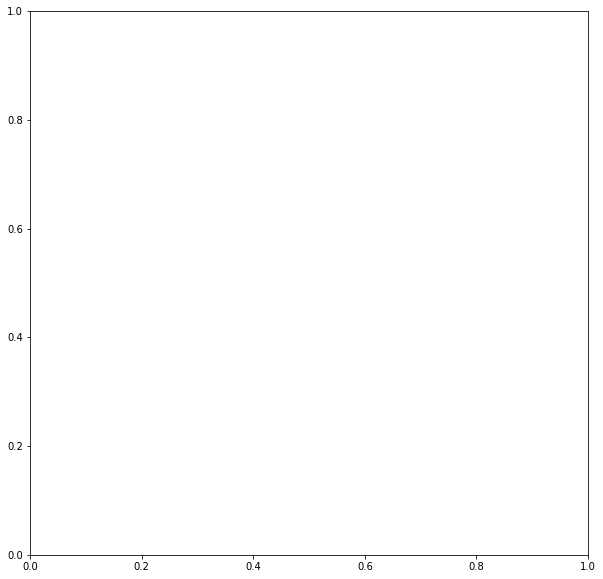

In [23]:
# 확률분포

import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 10))
plt.hist(df['Change'], bins='auto')
plt.show()

In [ ]:
print('lowest 5th percentile: ', round(np.percentile(sampled_df['Change'], 5), 5))
print('highest 5th percentile: ', round(np.percentile(sampled_df['Change'], 95), 5))
print(sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change']))

lowest 5th percentile:  0.97206
highest 5th percentile:  1.02387
0.5373374016380279


In [ ]:
# sampled_df의 Change > 1 전날의 데이터 인덱스
pre_increase = df.iloc[(sampled_df['Change'] > 1).index]['Change'].index[1:] - 1

In [ ]:
# 전날 특성상 상승할 확률
print(sum(df.loc[pre_increase]['Change'] > 1) / len(pre_increase))
print(sum(df.loc[pre_increase]['Volume_change'] < 1) / len(pre_increase))

0.5372630902666239
0.5043366527465467


In [ ]:
# 기하분포
# 성공의 확률인 p인 독립시행을 성공이 나올 때까지 계속한다고 할 때, 처음 성공까지 총 시도한 횟수 X의 확률분포.
# Pr(X = x) = p*(1-p)^(x-1)
# 𝝁   : 1/p  
# 𝝈^2 : (1-p)/p^2

# +%가 나올때가지 x의 확률
p = sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change'])
print('p: ', p)
print('mean: ', 1/p)
print('variance: ', (1-p)/(p**2))

p:  0.5373374016380279
mean:  1.8610280932456666
variance:  1.602397470603935


In [ ]:
x = range(1,10)
pr = list(map(lambda x: p*(1-p)**(x-1) , x))

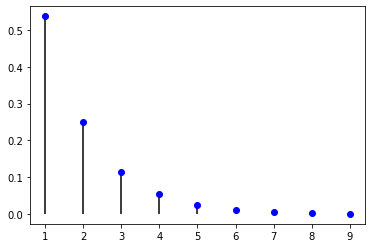

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, pr, 'bo')
plt.vlines(x, 0, pr)
plt.show()

In [ ]:
# 음이항분포
# 성공의 확률인 p인 독립시행을 r번째 성공이 나올 때까지 계속한다고 할 때, 처음 성공까지 총 시도한 횟수 X의 확률분포.
# Pr(X = x) = (x-1)C(r-1) * p^r * (1-p)^(x-r)
# 𝝁   : r/p  
# 𝝈^2 : r*(1-p)/p^2

# 5번째 +%가 나올때가지 x의 확률
p = sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change'])
r = 3
print('p: ', p)
print('mean: ', r/p)
print('variance: ', r*(1-p)/(p**2))

p:  0.5373374016380279
mean:  5.583084279737
variance:  4.807192411811805


In [ ]:
import math

def nCr(n,r):
    f = math.factorial
    return f(n) / (f(r) * f(n-r))

x = range(r,50)
pr = list(map(lambda x: nCr(x-1,r-1) * p**r * (1-p)**(x-r) , x))

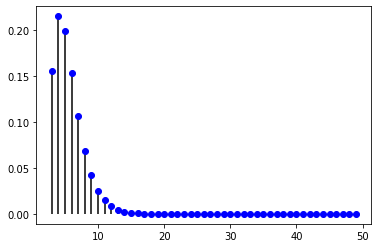

In [ ]:
import matplotlib.pyplot as plt

pr = list(map(lambda x: nCr(x-1,r-1) * p**r * (1-p)**(x-r) , x))
plt.plot(x, pr, 'bo')
plt.vlines(x, 0, pr)
plt.show()

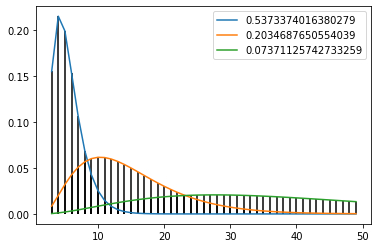

In [ ]:
import matplotlib.pyplot as plt

# 각각 0%, 1%, 2% 이상 r번의 시도에 나올 확률 
p = sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change']), sum(sampled_df['Change'] > 1.01) / len(sampled_df['Change']), \
sum(sampled_df['Change'] > 1.02) / len(sampled_df['Change']) 

for i in range(len(p)):
  pr = list(map(lambda x: nCr(x-1,r-1) * p[i]**r * (1-p[i])**(x-r) , x))
  plt.plot(x, pr)
  plt.vlines(x, 0, pr)
plt.legend(p)
plt.show()

In [ ]:
# 메모용
#
# 초기하분포
# 비복원추출에서 n개 중에 m개가 원하는 것이고, k번 추출했을때 원하는 것 x개가 뽑힐 확률의 분포이다.
# Pr(X = x) = nCx * (n-m)C(k-x) / nCk
# 𝝁   : k*m/n  
# 𝝈^2 : (k*m/n) * ((n-m)*(n-k)/(n*(n-1)))

# 5번째 +%가 나올때가지 x의 확률
x = 1
n = 3
m = 2
k = 6
#print('p: ', nCr(n,x) * nCr(n-m,k-x) / nCr(n,k)) 오류 뜸 ㅆ
print('mean: ', k*m/n)
print('variance: ', ((k*m/n) * ((n-m)*(n-k))/(n*(n-x))))

mean:  4.0
variance:  -2.0
